# Define grafo

In [20]:
import networkx as nx
import numpy as np

In [21]:
def cria_arestas_curtas(Grafo,Z):
    # As operaçoes sao inplace
    N = len(list(Grafo.nodes))
    for i in range(N):
        Grafo.add_edge(i,(i+1) % N)


    for i in range(N):
        f1 = (i-Z//2)
        f2 = (i+Z//2)
        max = f1 if f1 > f2 else f2
        min = f2 if f1 > f2 else f1
        for j in range(min, max):
            if i != j:
                Grafo.add_edge(i,j%N)

In [22]:
def cria_arestas_atalhos(Grafo,Z,p):
    N = len(list(Grafo.nodes))
    i = 0
    j = 0
    for _ in range(int(p*Z*N/2)):
        # while(i==j or Grafo.has_edge(i,j)):
        # # while(i==j):
        i = np.random.randint(0,N)
        j = np.random.randint(0,N)
        Grafo.add_edge(i,j)

In [23]:
def create_graph(N,Z,p):
    G = nx.Graph()
    G.add_nodes_from(range(N))
    cria_arestas_curtas(G,Z)
    cria_arestas_atalhos(G,Z,p)
    return G

# Funçoes de caminhos

In [16]:
def FindPathLengthsFromNode(Grafo, s):
    N = len(list(Grafo.nodes))
    visited = [False] * N
    queue = []
    distances = [0] * N
    queue.append(s)
    visited[s] = True
    result = [(s, 0)]
    
    while queue:
        s = queue.pop(0)
        for i in list(Grafo.neighbors(s)):
            if visited[i] == False:
                queue.append(i)
                visited[i] = True
                distances[i] = distances[s] + 1
                result.append((i, distances[i]))
    
    return result

In [17]:
def FindAllPathLengths(graph):
    N = len(list(graph.nodes))
    result = []
    for i in range(N):
        result.append(FindPathLengthsFromNode(graph, i))
    return result

In [18]:
def FindAveragePathLength(graph):
    N = len(list(graph.nodes))
    paths = FindAllPathLengths(graph)
    mean = 0
    for i in range(N):
        for j in range(N):
            mean += paths[i][j][1] / (N*N)
    return mean

In [19]:
import matplotlib.pyplot as plt
def plot_pretty_histogram(data, bins=None, title="Histograma", xlabel="Valores", ylabel="Frequência", 
                          color='skyblue', alpha=0.7, edgecolor='black', grid=True, style='seaborn', ax=None):
    """
    Plota um histograma estilizado.

    Parâmetros:
        - data (list ou array): Dados para o histograma.
        - bins (int ou sequência): Número de bins ou bordas dos bins. Padrão: None (determinado automaticamente).
        - title (str): Título do gráfico. Padrão: "Histograma".
        - xlabel (str): Rótulo do eixo X. Padrão: "Valores".
        - ylabel (str): Rótulo do eixo Y. Padrão: "Frequência".
        - color (str): Cor das barras. Padrão: 'skyblue'.
        - alpha (float): Transparência das barras (0 a 1). Padrão: 0.7.
        - edgecolor (str): Cor das bordas das barras. Padrão: 'black'.
        - grid (bool): Se True, adiciona uma grade. Padrão: True.
        - style (str): Estilo do Matplotlib. Padrão: 'seaborn'.
        - ax (matplotlib axis): Eixo onde o histograma será plotado. Padrão: None.
    """
    if style:
        plt.style.use(style)
    
    # Plotar no eixo fornecido
    ax = ax or plt.gca()
    ax.hist(data, bins=bins, color=color, alpha=alpha, edgecolor=edgecolor)
    ax.set_title(title, fontsize=14)
    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)
    
    if grid:
        ax.grid(axis='y', linestyle='--', alpha=0.7)

# Questoes

/tmp/ipykernel_207625/1159803619.py:21: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(style)


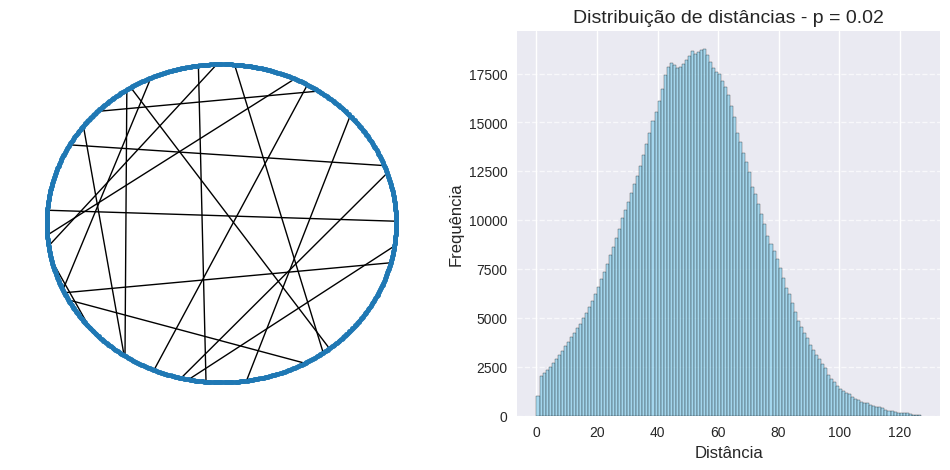

In [184]:
p = 0.02
G_1 = create_graph(1000, 2, p)

dist = FindAllPathLengths(G_1)
all_distances = []

for node_distances in dist:
    all_distances += [j for i,j in node_distances]


fig, axes = plt.subplots(1, 2, figsize=(12, 5))
plot_pretty_histogram(all_distances, bins=range(0, max(all_distances)+1), title=f"Distribuição de distâncias - p = {p}", xlabel="Distância", ylabel="Frequência", grid=True, ax=axes[1])
nx.draw_circular(G_1, ax=axes[0], node_size=10, with_labels=False)

/tmp/ipykernel_207625/1159803619.py:21: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(style)


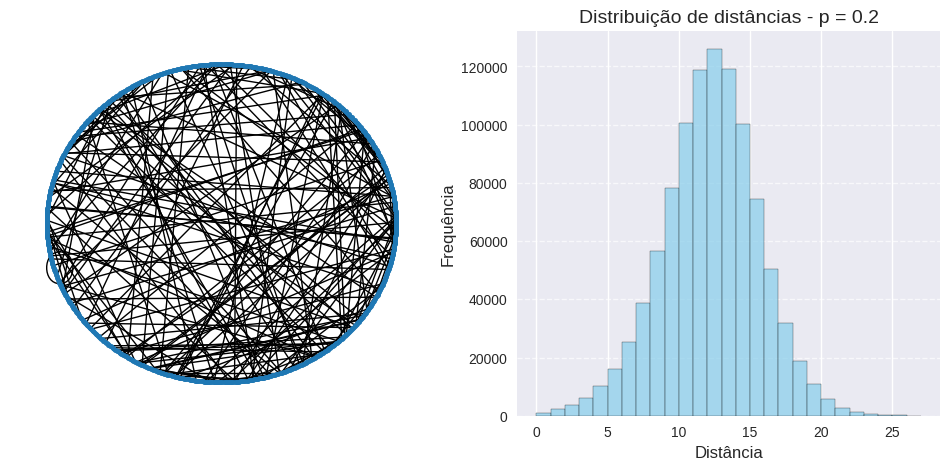

In [185]:
p = 0.2
G_2 = create_graph(1000, 2, p)

dist = FindAllPathLengths(G_2)
all_distances = []

for node_distances in dist:
    all_distances += [j for i,j in node_distances]


fig, axes = plt.subplots(1, 2, figsize=(12, 5))
plot_pretty_histogram(all_distances, bins=range(0, max(all_distances)+1), title=f"Distribuição de distâncias - p = {p}", xlabel="Distância", ylabel="Frequência", grid=True, ax=axes[1])
nx.draw_circular(G_2, ax=axes[0], node_size=10, with_labels=False)

/tmp/ipykernel_207625/1159803619.py:21: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(style)


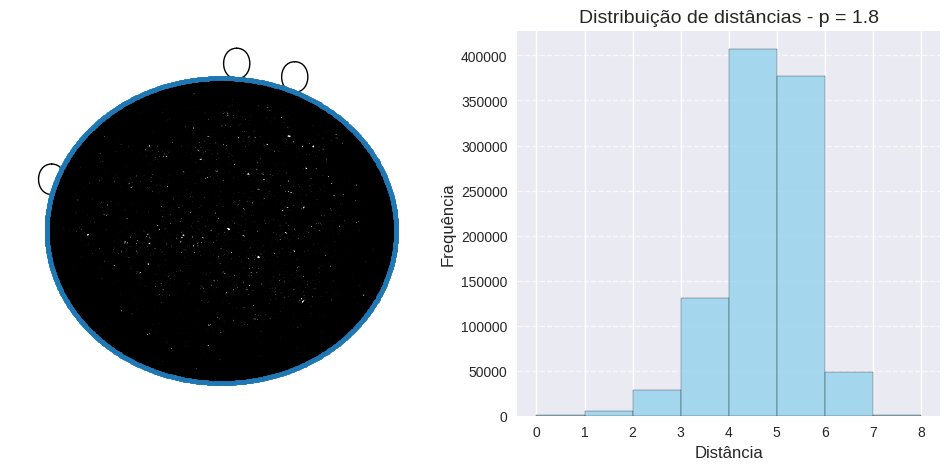

In [186]:
p = 1.8
G_3 = create_graph(1000, 2, p)

dist = FindAllPathLengths(G_3)
all_distances = []

for node_distances in dist:
    all_distances += [j for i,j in node_distances]


fig, axes = plt.subplots(1, 2, figsize=(12, 5))
plot_pretty_histogram(all_distances, bins=range(0, max(all_distances)+1), title=f"Distribuição de distâncias - p = {p}", xlabel="Distância", ylabel="Frequência", grid=True, ax=axes[1])
nx.draw_circular(G_3, ax=axes[0], node_size=10, with_labels=False)

Quanto maior o valor de p maior o deslocamento no eixo x para a esquerda, ou seja, as distancias médias tendem a diminuir se aumentarmos o valor de p, na pratica isso significa que quanto mais arestas de atalho são colocadas menores as distancia, e para alcançar um grau de separaçao proximo de 6 no histograma seria algum valor de p pŕoximo de 2.

In [45]:
for i in range(5):
    N = 100
    Z = 2
    p = 0.1
    G_4 = create_graph(N, Z, p)

    print(FindAveragePathLength(G_4))
print("Numero de arestas de atalhos: ",int(p*Z*N/2))

11.706000000000067
8.89040000000007
9.707999999999906
8.777000000000152
9.791800000000032
Numero de arestas de atalhos:  10


100%|██████████| 10/10 [00:00<00:00, 29.20it/s]


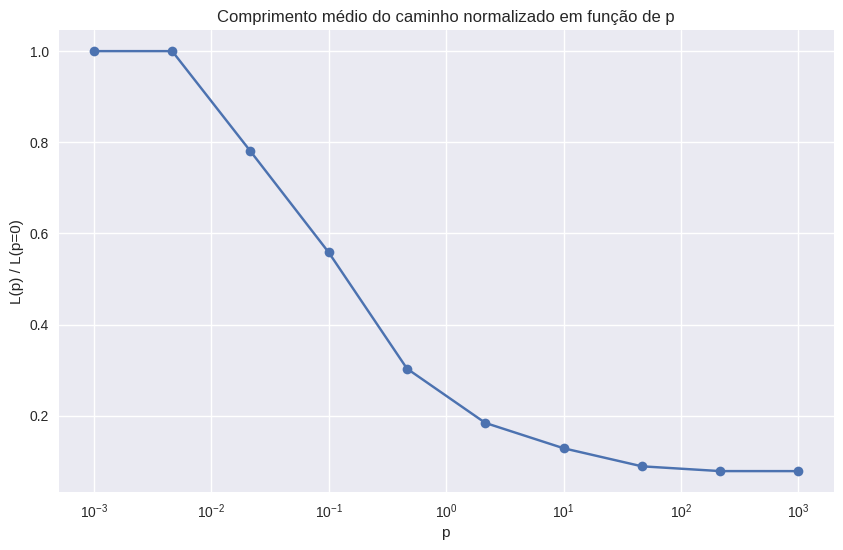

In [191]:
from tqdm import tqdm

N = 50
Z = 2
p_values = np.logspace(-3, 3, num=10)
G = create_graph(N, Z, 0)
L_p0 = FindAveragePathLength(G)

L_p = []
for p in tqdm(p_values):
    G = create_graph(N, Z, p)
    L_p.append(FindAveragePathLength(G))

L_p_normalized = [L / L_p0 for L in L_p]

plt.figure(figsize=(10, 6))
plt.semilogx(p_values, L_p_normalized, marker='o')
plt.xlabel('p')
plt.ylabel('L(p) / L(p=0)')
plt.title('Comprimento médio do caminho normalizado em função de p')
plt.grid(True)
plt.show()

O gráfico é fixado em 1 para 𝑝 p pequeno devido ao comportamento típico de uma rede regular. Quando p é pequeno, as ligações entre os nós são predominantemente curtas, e o comprimento médio do caminho entre os nós é similar ao da rede regular (ou seja, muito pequeno). À medida que p aumenta, há uma transição para uma rede mais conectada, diminuindo o comprimento médio do caminho. Isso reflete o que é visto na curva no gráfico, onde as mudanças são mais visíveis para p não muito pequeno ou muito grande, mostrando a relação entre a regularidade e a aleatoriedade nas redes.

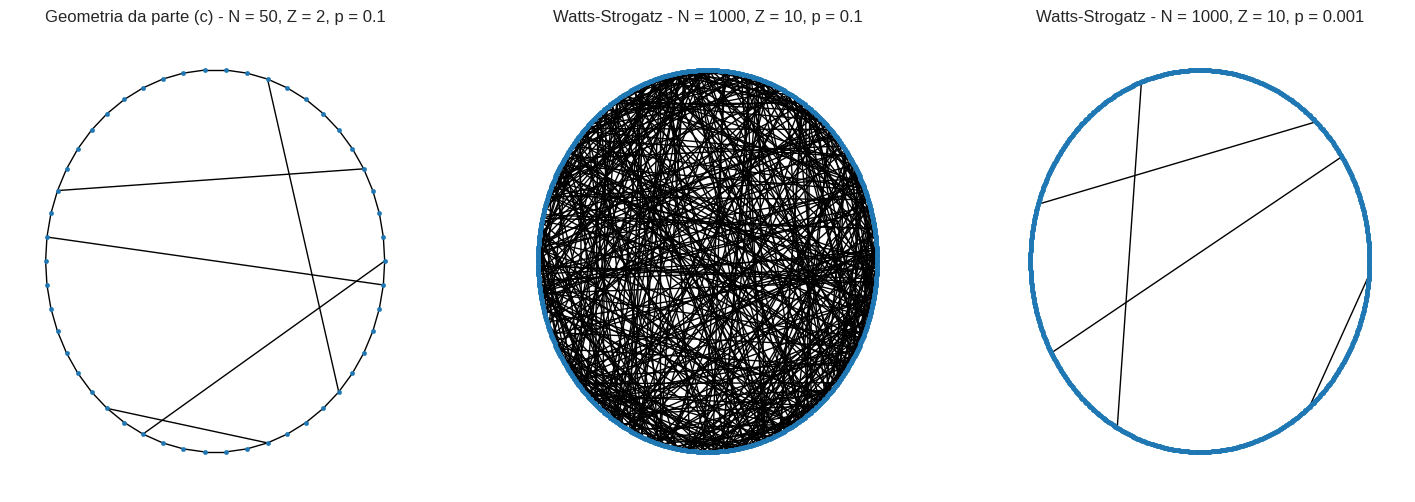

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

N_c = 50
Z_c = 2
p_c = 0.1
G_c = create_graph(N_c, Z_c, p_c)

nx.draw_circular(G_c, ax=axes[0], node_size=10)
axes[0].set_title(f'Geometria da parte (c) - N = {N_c}, Z = {Z_c}, p = {p_c}')

N_ws = 1000
z_ws = 10
p_ws1 = 0.1
p_ws2 = 0.001

G_ws1 = nx.watts_strogatz_graph(N_ws, z_ws, p_ws1)
G_ws2 = nx.watts_strogatz_graph(N_ws, z_ws, p_ws2)

nx.draw_circular(G_ws1, ax=axes[1], node_size=10)
axes[1].set_title(f'Watts-Strogatz - N = {N_ws}, Z = {z_ws}, p = {p_ws1}')
nx.draw_circular(G_ws2, ax=axes[2], node_size=10)
axes[2].set_title(f'Watts-Strogatz - N = {N_ws}, Z = {z_ws}, p = {p_ws2}')
plt.show()

O segunfo grafo gerado se parece mais comm o meu.

N=200, Z=4: 100%|██████████| 25/25 [00:06<00:00,  3.89it/s]


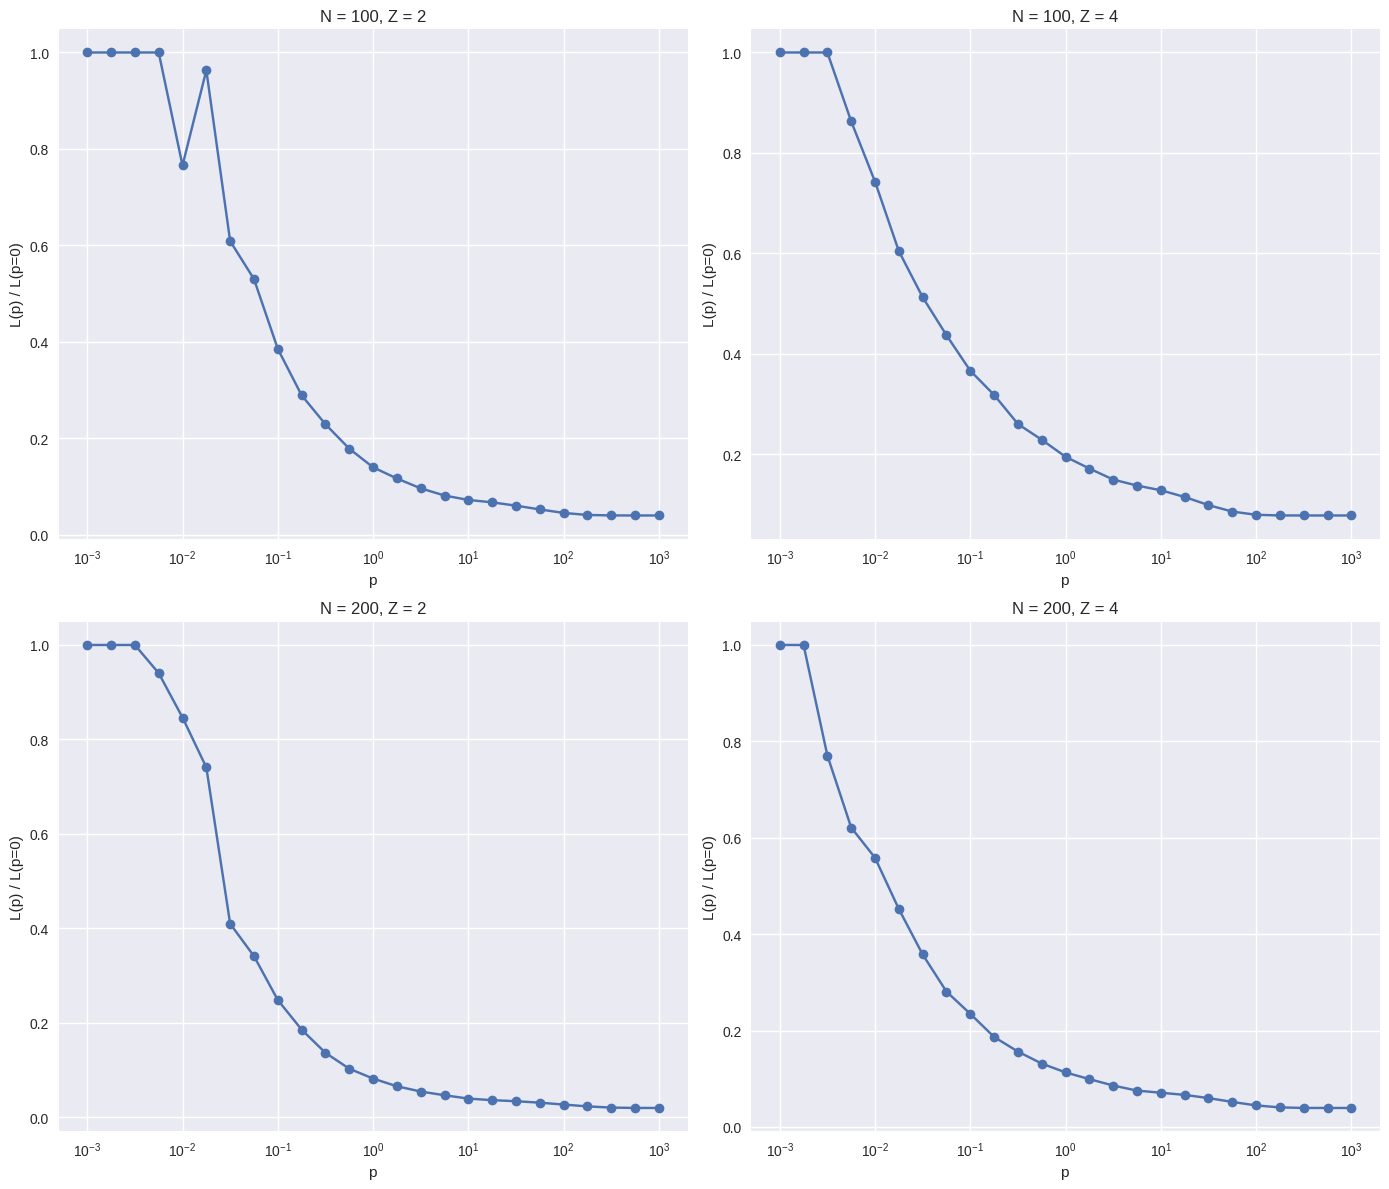

In [198]:
N_values = [100, 200]
Z_values = [2, 4]
p_range = np.logspace(-3, 3, num=25)

fig, axes = plt.subplots(2, 2, figsize=(14, 12))

for i, N in enumerate(N_values):
    for j, Z in enumerate(Z_values):
        L_p0 = FindAveragePathLength(create_graph(N, Z, 0))
        L_p = []
        for p in tqdm(p_range, desc=f'N={N}, Z={Z}'):
            G = create_graph(N, Z, p)
            L_p.append(FindAveragePathLength(G))
        
        L_p_normalized = [L / L_p0 for L in L_p]
        axes[i, j].semilogx(p_range, L_p_normalized, marker='o')
        axes[i, j].set_xlabel('p')
        axes[i, j].set_ylabel('L(p) / L(p=0)')
        axes[i, j].set_title(f'N = {N}, Z = {Z}')
        axes[i, j].grid(True)

plt.tight_layout()
plt.show()

Quanto maior o numero de cidades e o numero de Z, mais rapida vai ser a queda da distância com o aumento de p, pois esses valores irão começar a dominar o limite de arestas de atalho que são colocadas no grafo.

# Vida real

In [41]:
with open('web-polblogs.mtx', 'r') as file:
    # Ler todas as linhas
    lines = file.readlines()

# Criando o grafo
G = nx.Graph()

# Processando cada linha
for line in lines:
    # Separar os valores por espaço
    node1, node2 = map(float, line.split())
    node1 -= 1
    node2 -= 1
    
    # Adicionar a aresta ao grafo
    G.add_edge(int(node1), int(node2))


/tmp/ipykernel_6126/1159803619.py:21: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(style)


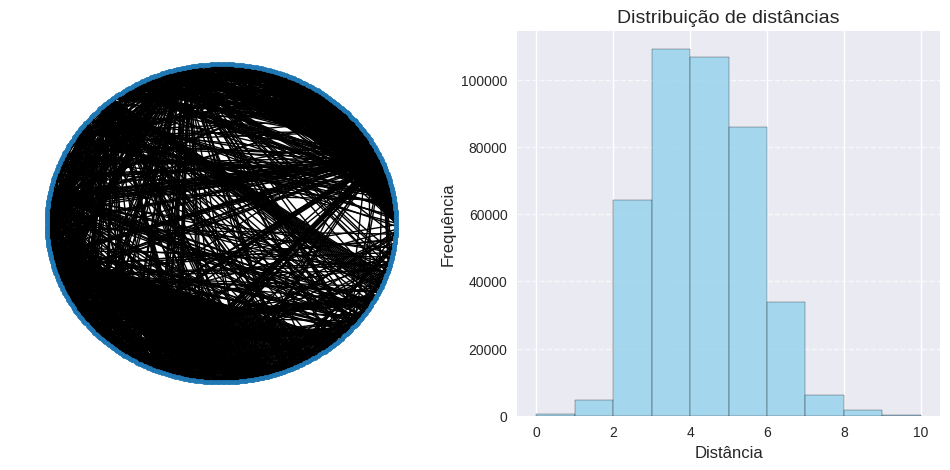

In [42]:
# distancia_media = nx.average_shortest_path_length(G)
# all_distances = nx.all_pairs_dijkstra_path_length(G)
all_distances = []
for node_distances in FindAllPathLengths(G):
    all_distances += [j for i,j in node_distances]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
plot_pretty_histogram(all_distances, bins=range(0, int(max(all_distances))+1), title=f"Distribuição de distâncias", xlabel="Distância", ylabel="Frequência", grid=True, ax=axes[1])
nx.draw_circular(G, ax=axes[0], node_size=10, with_labels=False)